In [9]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect

In [10]:
file_path = '../data/df_repos_metadata_star_up_to_max.json'
with open(file_path, 'r') as file:
    loaded_data = json.load(file)

In [11]:
df = pd.DataFrame(data=loaded_data)

In [12]:
#df.head(3)

In [13]:
df.iloc[130:]

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,open_issues_count,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score
130,5274894,electrum,spesmilo/electrum,https://github.com/spesmilo/electrum,Electrum Bitcoin Wallet,https://api.github.com/repos/spesmilo/electrum,https://api.github.com/repos/spesmilo/electrum...,2012-08-02T16:24:30Z,2025-04-12T20:05:24Z,2025-04-12T09:10:00Z,...,1156,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[bitcoin, bitcoin-wallet, electrum, lightning,...",public,3203,1156,7832,master,1.0
131,797246647,IC-Light,lllyasviel/IC-Light,https://github.com/lllyasviel/IC-Light,More relighting!,https://api.github.com/repos/lllyasviel/IC-Light,https://api.github.com/repos/lllyasviel/IC-Lig...,2024-05-07T13:26:05Z,2025-04-13T11:27:37Z,2025-02-20T15:52:35Z,...,105,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,[],public,483,105,7831,main,1.0
132,954873280,A2A,google/A2A,https://github.com/google/A2A,An open protocol enabling communication and in...,https://api.github.com/repos/google/A2A,https://api.github.com/repos/google/A2A/labels...,2025-03-25T18:44:21Z,2025-04-13T12:08:47Z,2025-04-12T18:48:37Z,...,62,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,[],public,567,62,7818,main,1.0
133,187313516,fuzzDicts,TheKingOfDuck/fuzzDicts,https://github.com/TheKingOfDuck/fuzzDicts,"You Know, For WEB Fuzzing ! 日站用的字典。",https://api.github.com/repos/TheKingOfDuck/fuz...,https://api.github.com/repos/TheKingOfDuck/fuz...,2019-05-18T04:21:48Z,2025-04-13T11:27:46Z,2023-11-13T03:48:29Z,...,0,None,True,"[directory, fuzz-testing, fuzzer, fuzzing, par...",public,2462,0,7817,master,1.0
134,656455590,FastSAM,CASIA-IVA-Lab/FastSAM,https://github.com/CASIA-IVA-Lab/FastSAM,Fast Segment Anything,https://api.github.com/repos/CASIA-IVA-Lab/Fas...,https://api.github.com/repos/CASIA-IVA-Lab/Fas...,2023-06-21T02:05:15Z,2025-04-12T14:37:04Z,2024-07-30T13:35:06Z,...,131,"{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",True,[],public,725,131,7815,main,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,399495186,sqlmodel,fastapi/sqlmodel,https://github.com/fastapi/sqlmodel,"SQL databases in Python, designed for simplici...",https://api.github.com/repos/fastapi/sqlmodel,https://api.github.com/repos/fastapi/sqlmodel/...,2021-08-24T14:26:53Z,2025-04-13T10:18:35Z,2025-04-07T17:35:37Z,...,252,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[fastapi, json, json-schema, pydantic, python,...",public,713,252,15604,main,1.0
1046,691347156,MaxKB,1Panel-dev/MaxKB,https://github.com/1Panel-dev/MaxKB,💬 MaxKB is a ready-to-use AI chatbot that inte...,https://api.github.com/repos/1Panel-dev/MaxKB,https://api.github.com/repos/1Panel-dev/MaxKB/...,2023-09-14T02:05:12Z,2025-04-13T11:47:31Z,2025-04-11T08:58:06Z,...,122,"{'key': 'gpl-3.0', 'name': 'GNU General Public...",True,"[chatbot, deepseek-r1, knowledgebase, langchai...",public,2043,122,15599,main,1.0
1047,13258039,aiohttp,aio-libs/aiohttp,https://github.com/aio-libs/aiohttp,Asynchronous HTTP client/server framework for ...,https://api.github.com/repos/aio-libs/aiohttp,https://api.github.com/repos/aio-libs/aiohttp/...,2013-10-01T23:04:01Z,2025-04-13T03:09:40Z,2025-04-12T21:08:15Z,...,266,"{'key': 'other', 'name': 'Other', 'spdx_id': '...",True,"[aiohttp, async, asyncio, hacktoberfest, http,...",public,2070,266,15583,master,1.0
1048,410989014,codon,exaloop/codon,https://github.com/exaloop/codon,"A high-performance, zero-overhead, extensible ...",https://api.github.com/repos/exaloop/codon,https://api.github.com/repos/exaloop/codon/lab...,2021-09-27T17:56:34Z,2025-04-11T12:37:01Z,2025-04-06T23:20:51Z,...,94,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[compiler, gpu-programming, high-performance, ...",public,535,94,15580,develop,1.0


### analyse if repo is in English

In [14]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"

In [15]:
df['language_spoken'] = df['description'].apply(detect_language)

In [16]:
len(df[df['language_spoken'] == 'en'])

930

In [17]:
df = df[df['language_spoken'] == 'en']

### analyse numeric values

In [18]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,9.300000e+02,9.300000e+02,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.0
mean,2.770916e+08,1.393157e+05,22047.064516,22047.064516,3559.833333,404.382796,3559.833333,404.382796,22047.064516,1.0
std,2.801057e+08,5.272756e+05,31059.727096,31059.727096,6202.678258,1060.412165,6202.678258,1060.412165,31059.727096,0.0
min,2.655400e+04,7.000000e+00,7193.000000,7193.000000,108.000000,0.000000,108.000000,0.000000,7193.000000,1.0
25%,4.278876e+07,5.694000e+03,8928.250000,8928.250000,976.750000,62.000000,976.750000,62.000000,8928.250000,1.0
50%,1.520191e+08,2.406000e+04,12502.500000,12502.500000,1742.500000,147.500000,1742.500000,147.500000,12502.500000,1.0
75%,5.474738e+08,8.754150e+04,22212.000000,22212.000000,3379.250000,353.000000,3379.250000,353.000000,22212.000000,1.0
max,9.548733e+08,1.087097e+07,335520.000000,335520.000000,49242.000000,16073.000000,49242.000000,16073.000000,335520.000000,1.0


In [19]:
len(df[df['stargazers_count'] > 15372])

355

In [20]:
# estimation for number of bins
stars = df['stargazers_count'].unique().tolist()
num_of_stars = len(stars)
num_of_stars

882

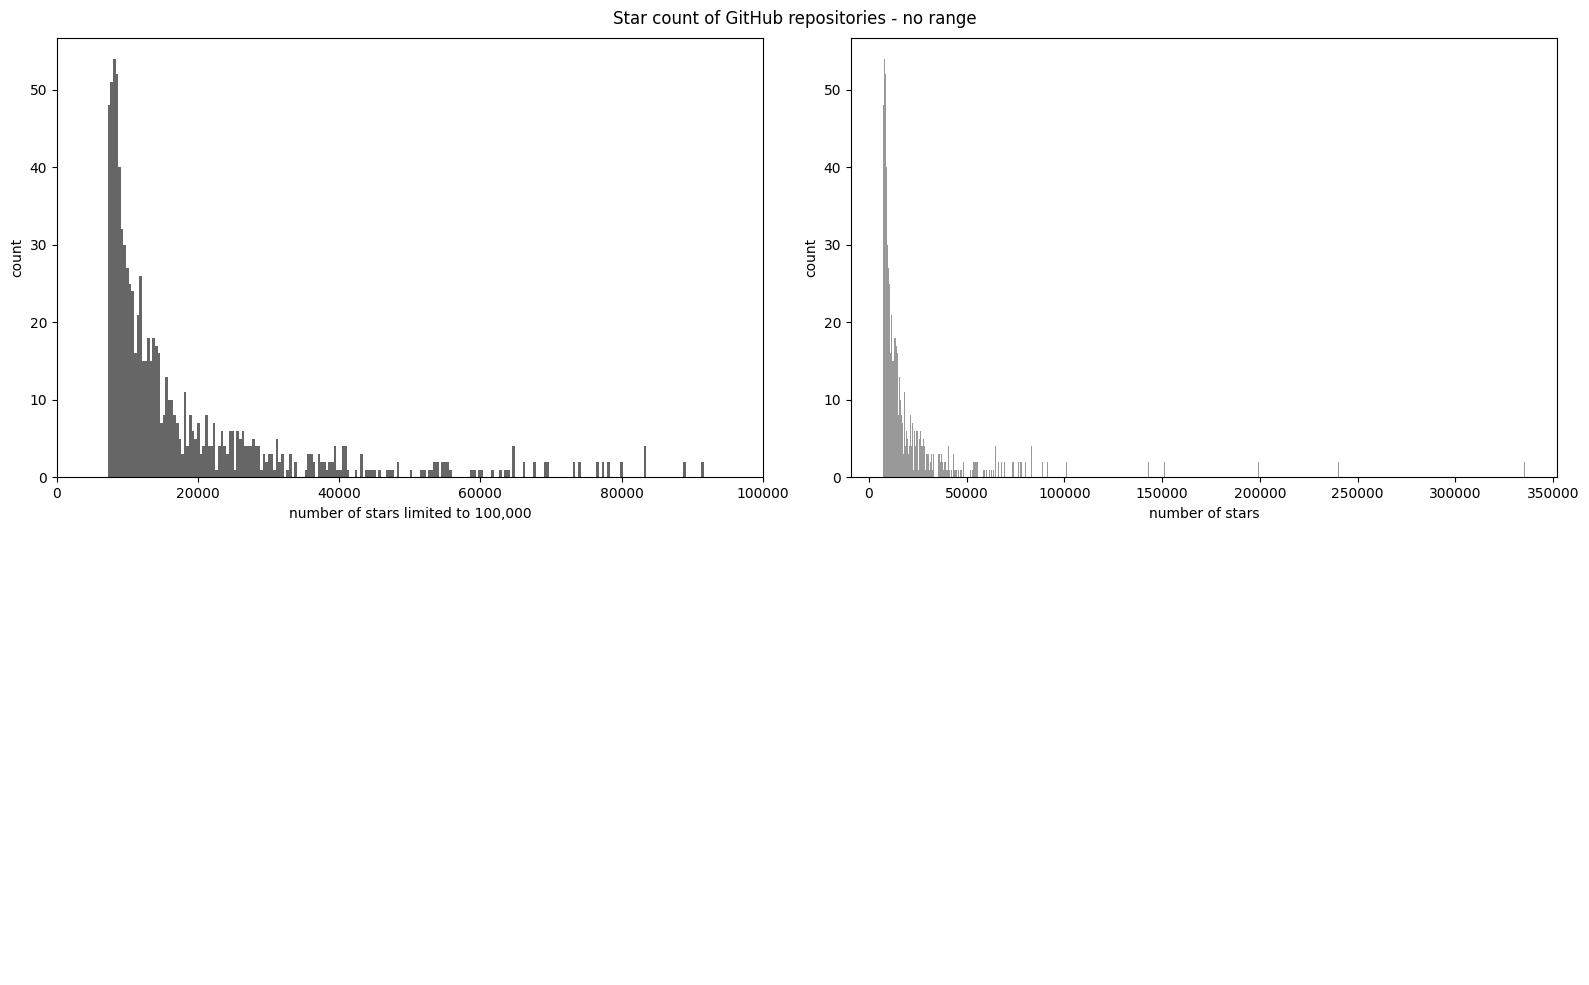

In [25]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=num_of_stars)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=num_of_stars)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('count')
ax[0,1].set_ylabel('count')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories - no range')
# format of interval between plots
plt.tight_layout()

plt.show()

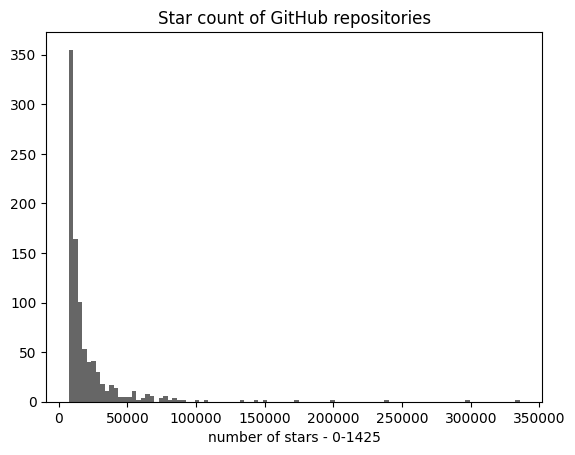

In [22]:
plt.hist(df['stargazers_count'], color='0.4', bins=100)
plt.xlabel('number of stars - 0-1425')
plt.title('Star count of GitHub repositories')

plt.show()

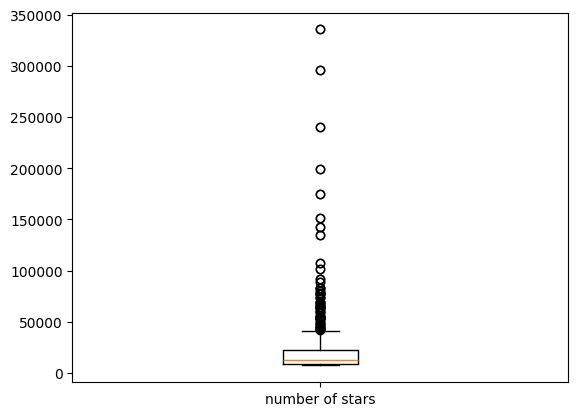

In [23]:
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()